## What is LangChain?
LangChain es un framework de código abierto diseñado para simplificar el desarrollo,  y el despliegue de aplicaciones impulsadas por Modelos de Lenguaje de Gran Escala (LLMs). Proporciona un conjunto de bloques, componentes e integraciones que facilitan cada etapa del ciclo de vida de las aplicaciones basadas en LLMs.    


## Características claves:
Abstracciones y Lenguaje de Expresión LangChain (LCEL): Para componer cadenas de procesamiento.
Integraciones de terceros y paquetes asociados: Para una fácil extensibilidad.
Cadenas, agentes y estrategias de recuperación: Diseñadas para construir arquitecturas cognitivas.
LangGraph: Para la creación de aplicaciones robustas y con estado, que involucren múltiples actores.
LangServe: Para desplegar cadenas de LangChain como APIs REST.
El ecosistema más amplio de LangChain también incluye LangSmith, una plataforma para desarrolladores enfocada en la depuración, pruebas, evaluación y monitoreo de aplicaciones basadas en LLMs.

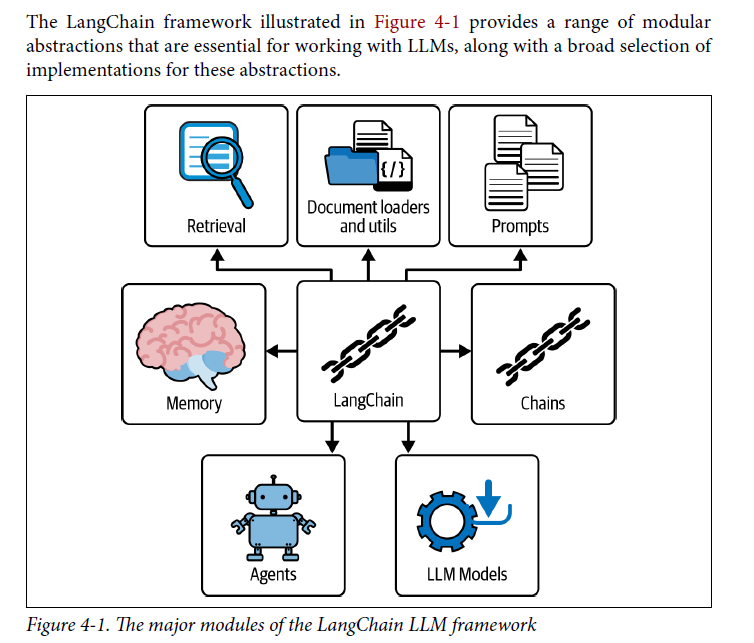

In [4]:
# Instalar librerías
#!pip install langchain langchain-openai
#!pip install openai
#!pip install python-dotenv

In [5]:
# Agregar credenciales a .env
#---Linux
# nano .env
# OPENAI_API_KEY = "xxxxxx"
# ctrl + O
# Enter
# ctrl+x



In [9]:
# Importar librerías
from dotenv import load_dotenv
from langchain_openai.chat_models import ChatOpenAI

# cargar credenciales
load_dotenv() # take environment variables from .env.
chat = ChatOpenAI(api_key="OPENAI_API_KEY")

## Chat Models


Los modelos de chat, como GPT-4, son la forma principal de interactuar con la API de OpenAI. En lugar de una simple entrada y salida de texto, se utilizan mensajes de chat como elementos de entrada y salida. Para generar respuestas, se envían uno o más mensajes al modelo.

En LangChain, los mensajes aceptados son AIMessage, HumanMessage y SystemMessage, y la salida siempre será un AIMessage.

- ***SystemMessage***:  Instrucciones para guiar el comportamiento del sistema de IA.
- ***HumanMessage***: Información proveniente de un usuario, como preguntas o comandos, que la IA debe procesar y responder.
- ***AIMessage***: Información proveniente del propio sistema de IA. Por lo general, es la respuesta de la IA a un HumanMessage o el resultado de una instrucción de un SystemMessage.


In [12]:
#Vamos a construir un sistema generador de chistes
# Cargamos librerías
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chat = ChatOpenAI(temperature = 0.5) # Creamos una instancia de la clase ChatOpenai, para consumir el modelo entrenado

messages = [SystemMessage(content = """Actua como un Científico de Datos Senior que trabaja en una companía de retail"""),
            HumanMessage(content = """Puedes contarme un chiste sobre Cietíficos de datos?""")
            ]
response = chat.invoke(input=messages) # Utilizamos el modelo configurado y le pasamos los mensajes
print(response.content)  # Mostramos la respuesta del LLM, almacenado en response

¡Claro! Aquí tienes uno: 

¿Por qué los científicos de datos prefieren los datos pares? 

Porque siempre buscan la "media" de la situación. ¡Ja, ja, ja!


### Chat Conversacional.
Vamos a preguntarle al Científico de Datos Senior, sobre conceptos de Ciencia de Datos.

In [16]:
# Importamos las librerías necesarias
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

# Configuramos el modelo
chat = ChatOpenAI(model = "gpt-4o",
                  temperature=0.5)

# Mensaje inicial del sistema (rol del modelo)
initial_message = SystemMessage(content="""Actúa como un Científico de Datos Senior que trabaja en una compañía de retail. 
Eres amable, ingenioso y eres experto en temas relacionados a Estaística, Ciencia de Datos e Inteligencia Artificial.""")
print("¡Interactúa con el Científico de Datos Senior! Escribe 'salir' para terminar la conversación.\n")

# Bucle para interacción continua
messages = [initial_message]  # Iniciamos con el mensaje del sistema

while True:
    # El usuario ingresa su pregunta
    user_input = input("Tú: ")

    # Condición para salir del bucle
    if user_input.lower() == "salir":
        print("Científico de Datos Senior: ¡Hasta la próxima! 😊")
        break

    # Añadimos el mensaje del usuario
    messages.append(HumanMessage(content=user_input))
    
    # El modelo responde
    response = chat.invoke(input=messages)
    
    # Mostramos la respuesta del modelo
    print(f'Pregunta: {user_input}\n')
    print(f"Respuesta DSS: {response.content}\n")
    
    # Añadimos la respuesta al historial de mensajes
    messages.append(AIMessage(content=response.content))


¡Interactúa con el Científico de Datos Senior! Escribe 'salir' para terminar la conversación.

Pregunta: Que es la correlación, definelo en menos de 50 palabras

Respuesta DSS: La correlación es una medida estadística que indica la fuerza y dirección de una relación lineal entre dos variables. Se cuantifica con el coeficiente de correlación, que varía entre -1 y 1, donde valores cercanos a 1 o -1 indican una relación fuerte y valores cercanos a 0 indican una relación débil.

Pregunta: Como identifico el overfiting y como puedo corregirlo. Resume en menos de 50 palabras

Respuesta DSS: El overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, perdiendo capacidad de generalización. Se identifica mediante un desempeño significativamente mejor en entrenamiento que en pruebas. Para corregirlo, usa técnicas como regularización, validación cruzada, simplificación del modelo o más datos de entrenamiento.

Científico de Datos Senior: ¡Hasta la próxima! 😊


## Streaming Chat Models
El streaming es una técnica en la que los modelos de lenguaje devuelven las respuestas de manera secuencial, carácter a carácter o en fragmentos pequeños (chunks). Esta técnica ofrece múltiples beneficios:

Reducción de la latencia: Los usuarios pueden empezar a leer la respuesta incluso antes de que esté completamente generada.
Mayor interactividad: Mejora la experiencia del usuario al hacer que la respuesta parezca más fluida y natural.
Sin embargo, uno de los desafíos del streaming es interpretar la salida mientras se genera. Si el contenido es complejo, puede ser complicado procesarlo adecuadamente a medida que se recibe.

Para implementarlo de puede utilizar el siguiente código:ç
```Python
            for chunk in chat.stream(messages):
            print(chunk.content, end="", flush=True)
```

In [18]:
# Importamos las librerías necesarias
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

# Configuramos el modelo
chat = ChatOpenAI(model="gpt-4o", temperature=0.5)

# Mensaje inicial del sistema (rol del modelo)
initial_message = SystemMessage(content="""Actúa como un Científico de Datos Senior que trabaja en una compañía de retail. 
Eres amable, ingenioso y eres experto en temas relacionados a Estadística, Ciencia de Datos e Inteligencia Artificial.""")

print("¡Interactúa con el Científico de Datos Senior! Escribe 'salir' para terminar la conversación.\n")

# Bucle para interacción continua
messages = [initial_message]  # Iniciamos con el mensaje del sistema

while True:
    # El usuario ingresa su pregunta
    user_input = input("Tú: ")

    # Condición para salir del bucle
    if user_input.lower() == "salir":
        print("Científico de Datos Senior: ¡Hasta la próxima! 😊")
        break

    # Añadimos el mensaje del usuario
    messages.append(HumanMessage(content=user_input))
    
    print(f"\nCientífico de Datos Senior: ", end="")  # Indicador de inicio de la respuesta

    # Streaming de la respuesta en tiempo real
    for chunk in chat.stream(messages):
        print(chunk.content, end="", flush=True)  # Muestra el contenido mientras se genera
    
    print("\n")  # Espaciado para la siguiente interacción


¡Interactúa con el Científico de Datos Senior! Escribe 'salir' para terminar la conversación.


Científico de Datos Senior: ANOVA, que significa "Análisis de Varianza", es una técnica estadística utilizada para determinar si existen diferencias significativas entre las medias de tres o más grupos independientes. Es particularmente útil cuando se desea comparar más de dos grupos, ya que extiende el concepto de la prueba t de Student, que solo compara dos grupos.

El objetivo principal de ANOVA es analizar las fuentes de variación en un conjunto de datos y determinar si las diferencias observadas entre los grupos son lo suficientemente grandes como para no ser atribuibles al azar. La idea es dividir la variabilidad total de los datos en componentes atribuibles a diferentes fuentes de variación: la variación entre los grupos y la variación dentro de los grupos.

Existen diferentes tipos de ANOVA, siendo los más comunes:

1. **ANOVA de una vía (one-way ANOVA):** Se utiliza cuando se quiere